In [1]:
#  TOPIC MODELING/TEXT CLASS. SERIES  #
#             Lesson 02.03            #
# TF-IDF in Python with Scikit Learn  #
#               Akanksha Saxena            #
#         RA,  ESCP Business School   #
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import string
from nltk.corpus import stopwords
import json
import glob
import re

In [2]:
!pip install PyPrind

In [3]:
!pip install lda

In [3]:
!pip install tmtoolkit


In [4]:
!pip install spacy

In [5]:
!pip install -U "tmtoolkit[recommended,lda,sklearn,gensim]"

Requirement already up-to-date: tmtoolkit[gensim,lda,recommended,sklearn] in c:\users\asus\anaconda3\lib\site-packages (0.11.2)
  Using cached lda-2.0.0.tar.gz (320 kB)
  Using cached Pillow-9.2.0-cp38-cp38-win_amd64.whl (3.3 MB)

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\ASUS\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\ASUS\\AppData\\Local\\Temp\\pip-install-b5wzxs4i\\lda\\setup.py'"'"'; __file__='"'"'C:\\Users\\ASUS\\AppData\\Local\\Temp\\pip-install-b5wzxs4i\\lda\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\ASUS\AppData\Local\Temp\pip-wheel-yo_6dfx4'
       cwd: C:\Users\ASUS\AppData\Local\Temp\pip-install-b5wzxs4i\lda\
  Complete output (37 lines):
  C:\Users\ASUS\anaconda3\lib\site-packages\setuptools\dist.py:42: DistDeprecationWarning: Do not call this function
    warnings.warn("Do not call this function", DistDeprecationWarning)
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.8
  creating build\lib.win-amd64-3.8\lda



  Running setup.py clean for lda
Failed to build lda
    Running setup.py install for lda: started
    Running setup.py install for lda: finished with status 'error'


  ----------------------------------------
  ERROR: Failed building wheel for lda
    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\ASUS\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\ASUS\\AppData\\Local\\Temp\\pip-install-b5wzxs4i\\lda\\setup.py'"'"'; __file__='"'"'C:\\Users\\ASUS\\AppData\\Local\\Temp\\pip-install-b5wzxs4i\\lda\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record 'C:\Users\ASUS\AppData\Local\Temp\pip-record-u4mnxa4z\install-record.txt' --single-version-externally-managed --compile --install-headers 'C:\Users\ASUS\anaconda3\Include\lda'
         cwd: C:\Users\ASUS\AppData\Local\Temp\pip-install-b5wzxs4i\lda\
    Complete output (39 lines):
    C:\Users\ASUS\anaconda3\lib\site-packages\setuptools\dist.py:42: DistDeprecationWarning: Do not call this function
   

In [6]:
!pip install -U tmtoolkit[textproc_extra]

Requirement already up-to-date: tmtoolkit[textproc_extra] in c:\users\asus\anaconda3\lib\site-packages (0.11.2)
  Using cached nltk-3.7-py3-none-any.whl (1.5 MB)
  Using cached PyICU-2.9.tar.gz (305 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\ASUS\anaconda3\python.exe' 'C:\Users\ASUS\anaconda3\lib\site-packages\pip\_vendor\pep517\_in_process.py' get_requires_for_build_wheel 'C:\Users\ASUS\AppData\Local\Temp\tmp1w9w9u55'
       cwd: C:\Users\ASUS\AppData\Local\Temp\pip-install-0gqc7pbu\pyicu
  Complete output (64 lines):
  (running 'icu-config --version')
  (running 'pkg-config --modversion icu-i18n')
  Traceback (most recent call last):
    File "setup.py", line 63, in <module>
      ICU_VERSION = os.environ['ICU_VERSION']
    File "C:\Users\ASUS\anaconda3\lib\os.py", line 675, in __getitem__
      raise KeyError(key) from None
  KeyError: 'ICU_VERSION'
  
  During handling of the above exception, another exception occurred:
  
  Traceback (most recent call last):
    File "setup.py", line 66, in <module>
      ICU_VERSION = check_output(('icu-config', '--version')).strip()
    File "setup.py", line 19, in check_output
      return subprocess_check_outpu

In [7]:
!pip install bidict

In [8]:
!pip install loky

In [9]:
from tmtoolkit.corpus import Corpus

In [10]:
from tmtoolkit.corpus import tokens_table

In [11]:
from tmtoolkit.corpus import print_summary

In [13]:
import os

In [14]:
path = "/home/user/Downloads/corpus text"
os.chdir(path)

In [15]:
cwd = os.getcwd()  # Get the current working directory (cwd)
cwd

'/home/user/Downloads/corpus text'

In [16]:
files = os.listdir('/home/user/Downloads/corpus text')  # Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

Files in '/home/user/Downloads/corpus text': ['IDC_White_Paper_Microsoft_Interim Draft 05 15 2020.txt', 'apr14alitanssicularfchoudharyamullen_733347.txt', 'notes-from-the-ai-frontier-ai-adoption-advances-but-foundational-barriers-remain.txt', 'us-cfo-insights-internet-of-things-revenue generation.txt', 'State-of-AI_Report_Web-capgemini.txt', 'IDC Forecasts Improved Growth for Global AI Market in 2021.txt', 'DI_State-of-AI-in-the-enterprise-2nd-ed.txt', 'licenced_google_idc_marketscape_visionai_apac.txt', 'Building the AI-Powered Organization.txt', 'How AI can unlock a $127B opportunity by reducing food waste _ McKinsey _ Company.txt', 'Experimenting with robots for grocery picking and packing _ Ocado Technology.txt', 'Global-survey-The-state-of-AI-in-2021.txt', 'The Future Is Hybrid Data, Embrace It - Cloudera Blog.txt', 'Using Alteryx to help get employees back to work p... - Alteryx Community.txt', 'Navigating the New Landscape of AI Platforms.txt', 'temp.txt', 'may26fkaramouzisupdat

In [17]:
from collections import defaultdict
from gensim import corpora

In [ ]:
from gensim.parsing.preprocessing import STOPWORDS
my_stop_words = STOPWORDS.union(set(['data','finance','lung','cancer','model', 'new','use','case','also','food','finance','gartner','alteryx','idc','mckinsey','deloitte']))

In [ ]:
stoplist = set('for a of the and to in'.split())
texts = [
    [word for word in document.lower().split() if word not in my_stop_words]
    for document in files
]

In [ ]:
# remove words that appear only once
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

texts = [
    [token for token in text if frequency[token] > 1]
    for text in texts
]

dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [ ]:
from gensim import models

tfidf = models.TfidfModel(corpus)  # step 1 -- initialize a model

In [ ]:
corpus_tfidf = tfidf[corpus]
for doc in corpus_tfidf:
    print(doc)

In [ ]:
lsi_model = models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=2)  # initialize an LSI transformation
corpus_lsi = lsi_model[corpus_tfidf]  # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi


In [ ]:
lsi_model.print_topics(5)

In [ ]:
!pip install smart_open[all]

In [ ]:
import io
import os.path
import re

import tarfile

import smart_open

def extract_documents(uri='/home/user/Downloads/corpus text'):
    with smart_open.open(url, "rb") as file:
        with tarfile.open(fileobj=file) as tar:
            for member in tar.getmembers():
                if member.isfile() and re.search(r'nipstxt/nips\d+/\d+\.txt', member.name):
                    member_bytes = tar.extractfile(member).read()
                    yield member_bytes.decode('utf-8', errors='replace')

docs = list(extract_documents())

In [ ]:
??smart_open

In [ ]:
from collections import Counter

In [ ]:
from nltk.corpus import stopwords

In [ ]:
!pip3 install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz

In [18]:
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 12.8 MB 3.8 MB/s eta 0:00:01    |██                              | 788 kB 3.8 MB/s eta 0:00:04     |█████▎                          | 2.1 MB 3.8 MB/s eta 0:00:03     |██████████████████████████▎     | 10.5 MB 3.8 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [19]:
import spacy
nlp=spacy.load('en_core_web_sm')

In [20]:
!python -m spacy download en_core_web_lg 

     |████████████████████████████████| 400.7 MB 4.8 kB/s  eta 0:00:01  |                                | 348 kB 3.1 MB/s eta 0:02:08     |▍                               | 4.9 MB 3.1 MB/s eta 0:02:07     |██▎                             | 29.0 MB 3.1 MB/s eta 0:01:59     |██▍                             | 29.9 MB 3.1 MB/s eta 0:01:59     |██▌                             | 31.2 MB 4.4 MB/s eta 0:01:24     |██▋                             | 33.1 MB 4.4 MB/s eta 0:01:24     |███                             | 37.6 MB 4.4 MB/s eta 0:01:23     |███                             | 38.6 MB 4.4 MB/s eta 0:01:22     |███▉                            | 48.5 MB 4.4 MB/s eta 0:01:20     |████▏                           | 51.8 MB 4.4 MB/s eta 0:01:19     |████▌                           | 55.8 MB 68.7 MB/s eta 0:00:06     |█████                           | 62.5 MB 68.7 MB/s eta 0:00:05     |█████▋                          | 70.9 MB 68.7 MB/s eta 0:00:05     |█████▉                          | 72.5 MB 

In [21]:
spacy.load('en_core_web_lg')

In [211]:
corp = Corpus.from_folder('/home/user/Downloads/corpus text', language='en', raw_preproc=strip_tags)

In [212]:
pip install -U tmtoolkit

Note: you may need to restart the kernel to use updated packages.


In [213]:
!pip install -U "tmtoolkit[recommended,lda,sklearn,gensim]"

In [214]:
from tmtoolkit.corpus import tokens_table

In [215]:
from tmtoolkit.corpus import corpus_summary

In [216]:
from tmtoolkit.corpus import strip_tags

In [217]:
corp['Accenture-AI-Momentum-2018']['token']

['AI',
 'MOMENTUM',
 ',',
 'MATURITY',
 '\n',
 '&',
 'MODELS',
 'FOR',
 'SUCCESS',
 '\n\n',
 'BASED',
 'ON',
 'FINDINGS',
 'FROM',
 'A',
 'GLOBAL',
 '\n',
 'EXECUTIVE',
 'SURVEY',
 '\n',
 'By',
 'SAS',
 ',',
 'Accenture',
 'Applied',
 'Intelligence',
 ',',
 ' \n',
 'and',
 'Intel',
 'with',
 'Forbes',
 'Insights',
 '\n\n',
 'MAKING',
 'AI',
 'BUSINESS',
 '-',
 'SMART',
 '\n\n\x0c\x0c',
 'TABLE',
 'OF',
 'CONTETS',
 '\n\n',
 'INTRODUCTION',
 '........................................................................................',
 '4',
 '\n\n',
 'AI',
 'IS',
 'WORKING',
 '...........................................................................................',
 '6',
 '\n\n',
 'THOSE',
 'WHO',
 'HAVE',
 'SUCCESSFULLY',
 'DEPLOYED',
 'AI',
 'SEE',
 '\n',
 'A',
 'STRONG',
 'CONNECTION',
 'BETWEEN',
 'AI',
 'AND',
 'ANALYTICS',
 '...............',
 '8',
 '\n\n',
 'FULL',
 'DEPLOYMENT',
 'LEVELS',
 'SIGNAL',
 'HEALTHY',
 'MOMENTUM',
 '..........',
 '10',
 '\n\n',
 'AI',
 'OVERSIGHT',
 

In [218]:
corp.doc_labels

['IDC_White_Paper_Microsoft_Interim Draft 05 15 2020',
 'apr14alitanssicularfchoudharyamullen_733347',
 'notes-from-the-ai-frontier-ai-adoption-advances-but-foundational-barriers-remain',
 'us-cfo-insights-internet-of-things-revenue generation',
 'State-of-AI_Report_Web-capgemini',
 'IDC Forecasts Improved Growth for Global AI Market in 2021',
 'DI_State-of-AI-in-the-enterprise-2nd-ed',
 'licenced_google_idc_marketscape_visionai_apac',
 'Building the AI-Powered Organization',
 'How AI can unlock a $127B opportunity by reducing food waste _ McKinsey _ Company',
 'Experimenting with robots for grocery picking and packing _ Ocado Technology',
 'Global-survey-The-state-of-AI-in-2021',
 'The Future Is Hybrid Data, Embrace It - Cloudera Blog',
 'Using Alteryx to help get employees back to work p... - Alteryx Community',
 'Navigating the New Landscape of AI Platforms',
 'temp',
 'may26fkaramouzisupdated_608384',
 'ten-red-flags-signaling-your-analytics-program-will-fail',
 'Andrew Ng_ Why AI 

In [219]:
print_summary(corp)

Corpus with 75 documents in English
> 3 Things AI Can Already Do for Your Company (516 tokens): AI And Machine Learning    Artificial Intelligence...
> 7,736 Hours Saved with Alteryx - Alteryx Community (1141 tokens): 6/20/22 , 3:04 PM    7,736 Hours Saved with Altery...
> Accenture-ERP-Report-2020 (8367 tokens): 2020 ERP Trends    Based on the UK ERP Trends Surv...
> 8-ai-trends-transforming-the-enterprise (7582 tokens): AI transforming   the enterprise    8 key AI adopt...
> 718813-the-ai-crunch-demands-practical-responses-a-gartner-trend-insight-report (3418 tokens): The AI Crunch Demands Practical Responses : A Gart...
> Accenture-AI-Momentum-2018 (7290 tokens): AI MOMENTUM , MATURITY   & MODELS FOR SUCCESS    B...
> Accenture-Unleashing-Exponential-Evolution-PDF (6421 tokens): 2019 ERP Trends    Based on the UK ERP Trends Surv...
> Accenture-Built-to-Scale-PDF-Report (5998 tokens): Provocative thinking , transformative insights ,  ...
> Andrew Ng_ Why AI Is the New Electricity _ S

In [220]:
from tmtoolkit.corpus import doc_tokens, tokens_table

In [ ]:
tok = doc_tokens(corp, with_attr=True)

In [ ]:
tbl = tokens_table(corp)
tbl

In [ ]:
tbl[tbl.like_num]

In [ ]:
tokens_table(corp, select=['gx-artificial-intelligence-and-data', '718813-the-ai-crunch-demands-practical-responses-a-gartner-trend-insight-report'],
             with_attr=['pos', 'tag'])

In [221]:
from tmtoolkit.corpus import vocabulary

vocabulary(corp,sort = False)

{'Signiﬁcant',
 'skilling',
 'hopping',
 'Korea',
 'moderately',
 'während',
 'atransaction',
 'beings',
 'presences',
 'receives',
 'backup',
 'Understandably',
 'wisely',
 'Shrinking',
 '14,000',
 'Audio',
 'replicates',
 'asynchronous',
 '\x0c',
 'Factors',
 'Bornstein',
 'economics',
 'Interdisciplinary',
 '219',
 'https://www.mckinsey.com/~/media/McKinsey/Featured%20Insights/Artificial%20Intelligence/',
 'supervise',
 'Treat',
 'AI100',
 'RESHAPING',
 'salient',
 'BRIEF',
 'indiatimes.com/business/india-business/diycam-brings-',
 'payoffs',
 'ordinary',
 'Arbor',
 'dependence',
 'toprepare',
 'Jenna',
 'carried',
 'predictions.14',
 'financial-',
 'dissatisfaction',
 'childhood',
 'https://www.yelpeconomicaverage.com/yea-q2-2020.html',
 'Portfolio',
 'https://jamanetwork.com/',
 'cells',
 '4/10',
 'impressions',
 'Poddar',
 'WHITE',
 'Spur',
 'Mittelstand',
 '240',
 'IBV',
 'findet',
 'inspiration',
 'Architect',
 'lousy',
 'PERFORMANCE',
 'portion',
 'chosen',
 'Theirs',
 '\uf350

In [222]:
from tmtoolkit.corpus import vocabulary_size

vocabulary_size(corp)

25096

In [223]:
from tmtoolkit.corpus import vocabulary_counts

vocabulary_counts(corp)

{'ID': 11,
 'POS': 1,
 'HEAD': 2,
 'PART': 3,
 'X': 33,
 'PRODUCT': 1,
 'TIME': 6,
 'MONEY': 1,
 'agent': 51,
 'det': 2,
 'mark': 2,
 'meta': 12,
 'number': 205,
 'prep': 1,
 'root': 6,
 '_': 7,
 'CONCLUSIONThe': 1,
 'FUTURE': 2,
 'passion': 1,
 'rasant': 1,
 'unable': 10,
 'predefined': 2,
 'Validating': 1,
 'Instructions': 1,
 'Alicia': 3,
 'Where': 22,
 'OASIS': 1,
 'z': 7,
 'Lochan': 2,
 'packed': 2,
 'approach': 226,
 'utility.16': 1,
 'beappreciated': 1,
 'Participating': 1,
 'https://www.ciodive.com/news/citizen-': 1,
 'users': 132,
 'average': 122,
 '216': 1,
 'designed': 61,
 'Improved': 12,
 'geared': 5,
 'Availability': 1,
 'Judging': 2,
 'stream': 7,
 'premier': 3,
 'sites': 13,
 'adidas': 1,
 'foorr': 1,
 'accenture.com/appliedintelligence': 2,
 'aterials': 1,
 'Dell': 2,
 'clincial-': 1,
 'Pilots': 3,
 'approving': 3,
 'FEEDBACK': 1,
 'Leistungen': 2,
 'optimising': 4,
 'Newsroom': 4,
 'Ramanathan': 1,
 'discourse': 1,
 'cell': 4,
 'conduct': 38,
 'twothings': 1,
 'angry'

In [224]:
import matplotlib.pyplot as plt
from tmtoolkit.corpus.visualize import (plot_doc_lengths_hist,
    plot_doc_frequencies_hist, plot_ranked_vocab_counts)

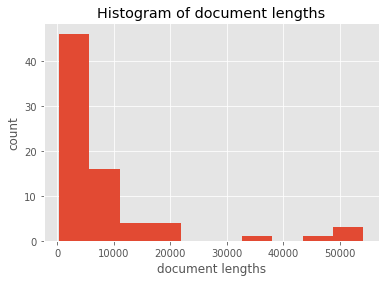

In [225]:
fig, ax = plt.subplots()
plot_doc_lengths_hist(fig, ax, corp, y_log=False)  # use linear scale
plt.show();

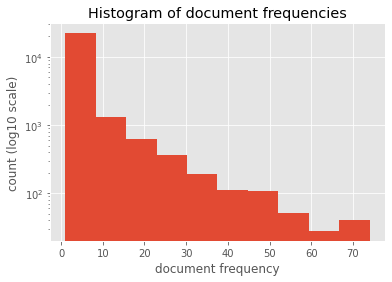

In [226]:
fig, ax = plt.subplots()
plot_doc_frequencies_hist(fig, ax, corp)
plt.show();

In [227]:
#This shows us that the large majority of token types has a low document frequency, i.e. they occur only in a few documents. There are only very few token types that occur in almost every document. Words like “the” or “a” are usually among these.

In [228]:
from tmtoolkit.corpus import to_lowercase

In [229]:
from copy import copy

corpus_orig = copy(corp)
print_summary(corpus_orig)   # same content

Corpus with 75 documents in English
> 3 Things AI Can Already Do for Your Company (516 tokens): AI And Machine Learning    Artificial Intelligence...
> 7,736 Hours Saved with Alteryx - Alteryx Community (1141 tokens): 6/20/22 , 3:04 PM    7,736 Hours Saved with Altery...
> Accenture-ERP-Report-2020 (8367 tokens): 2020 ERP Trends    Based on the UK ERP Trends Surv...
> 8-ai-trends-transforming-the-enterprise (7582 tokens): AI transforming   the enterprise    8 key AI adopt...
> 718813-the-ai-crunch-demands-practical-responses-a-gartner-trend-insight-report (3418 tokens): The AI Crunch Demands Practical Responses : A Gart...
> Accenture-AI-Momentum-2018 (7290 tokens): AI MOMENTUM , MATURITY   & MODELS FOR SUCCESS    B...
> Accenture-Unleashing-Exponential-Evolution-PDF (6421 tokens): 2019 ERP Trends    Based on the UK ERP Trends Surv...
> Accenture-Built-to-Scale-PDF-Report (5998 tokens): Provocative thinking , transformative insights ,  ...
> Andrew Ng_ Why AI Is the New Electricity _ S

In [230]:
id(corp), id(corpus_orig)

(140626771791344, 140626631307712)

In [231]:
from tmtoolkit.corpus import lemmatize

# we use `inplace=False` to generate a lemmatized copy `corpus_norm`
# of the original data; all further steps will be applied to `corpus_norm`
corpus_norm = lemmatize(corp, inplace=False)
tokens_table(corpus_norm)

,doc,position,token,is_punct,is_stop,lemma,like_num,pos,tag
0,3 Things AI Can Already Do for Your Company,0,AI,False,False,AI,False,PROPN,NNP
1,3 Things AI Can Already Do for Your Company,1,and,False,True,and,False,CCONJ,CC
2,3 Things AI Can Already Do for Your Company,2,Machine,False,False,Machine,False,PROPN,NNP
3,3 Things AI Can Already Do for Your Company,3,Learning,False,False,Learning,False,PROPN,NNP
4,3 Things AI Can Already Do for Your Company,4,\n\n,False,False,\n\n,False,SPACE,_SP
...,...,...,...,...,...,...,...,...,...
600777,winning-with-ai-is-a-state-of-mind-mckinsey,4807,of,False,True,of,False,ADP,IN
600778,winning-with-ai-is-a-state-of-mind-mckinsey,4808,mind,False,False,mind,False,NOUN,NN
600779,winning-with-ai-is-a-state-of-mind-mckinsey,4809,\n\n,False,False,\n\n,False,SPACE,_SP
600780,winning-with-ai-is-a-state-of-mind-mckinsey,4810,9,False,False,9,True,NUM,CD


In [232]:
from tmtoolkit.corpus import remove_chars

# remove only full stops "."
remove_chars(corpus_norm, ['.',',',';',':'])
print_summary(corpus_norm)

Corpus with 75 documents in English
> 3 Things AI Can Already Do for Your Company (516 tokens): AI and Machine Learning    Artificial Intelligence...
> 7,736 Hours Saved with Alteryx - Alteryx Community (1141 tokens): 6/20/22  304 pm    7736 hour save with Alteryx - A...
> Accenture-ERP-Report-2020 (8367 tokens): 2020 ERP trend    base on the UK ERP Trends Survey...
> 8-ai-trends-transforming-the-enterprise (7582 tokens): AI transform   the enterprise    8 key AI adoption...
> 718813-the-ai-crunch-demands-practical-responses-a-gartner-trend-insight-report (3418 tokens): the AI Crunch demand Practical Responses  a Gartne...
> Accenture-AI-Momentum-2018 (7290 tokens): AI MOMENTUM  MATURITY   & MODELS for success    ba...
> Accenture-Unleashing-Exponential-Evolution-PDF (6421 tokens): 2019 ERP trend    base on the UK ERP Trends Survey...
> Accenture-Built-to-Scale-PDF-Report (5998 tokens): provocative thinking  transformative insight    ta...
> Andrew Ng_ Why AI Is the New Electricity _ S

In [187]:
?remove_chars

In [233]:
from tmtoolkit.corpus import remove_punctuation

# remove all punctuation
remove_punctuation(corpus_norm)
print_summary(corpus_norm)

Corpus with 75 documents in English
> 3 Things AI Can Already Do for Your Company (516 tokens): AI and Machine Learning  Artificial Intelligence f...
> 7,736 Hours Saved with Alteryx - Alteryx Community (1141 tokens): 62022  304 pm  7736 hour save with Alteryx  Altery...
> Accenture-ERP-Report-2020 (8367 tokens): 2020 ERP trend  base on the UK ERP Trends Survey b...
> 8-ai-trends-transforming-the-enterprise (7582 tokens): AI transform  the enterprise  8 key AI adoption tr...
> 718813-the-ai-crunch-demands-practical-responses-a-gartner-trend-insight-report (3418 tokens): the AI Crunch demand Practical Responses  a Gartne...
> Accenture-AI-Momentum-2018 (7290 tokens): AI MOMENTUM  MATURITY   MODELS for success  base o...
> Accenture-Unleashing-Exponential-Evolution-PDF (6421 tokens): 2019 ERP trend  base on the UK ERP Trends Survey b...
> Accenture-Built-to-Scale-PDF-Report (5998 tokens): provocative thinking  transformative insight   tan...
> Andrew Ng_ Why AI Is the New Electricity _ S

In [234]:
from tmtoolkit.corpus import corpus_unique_chars

# original corpus
sorted(corpus_unique_chars(corp))

['\x00',
 '\t',
 '\n',
 '\x0c',
 ' ',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 '[',
 '\\',
 ']',
 '_',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '{',
 '|',
 '~',
 '\x83',
 '\xa0',
 '£',
 '©',
 '®',
 '°',
 '²',
 '³',
 '·',
 '¹',
 '½',
 'Ç',
 '×',
 'Ü',
 'ß',
 'ä',
 'ç',
 'é',
 'ë',
 'í',
 'ï',
 'ñ',
 'ó',
 'ö',
 '÷',
 'ü',
 'ʼ',
 '\u2002',
 '\u2003',
 '\u2009',
 '\u200a',
 '–',
 '—',
 '―',
 '‘',
 '’',
 '“',
 '”',
 '„',
 '•',
 '…',
 '⁴',
 '€',
 '™',
 '←',
 '→',
 '−',
 '≠',
 '≤',
 '≥',
 '■',
 '▪',
 '✓',
 '✕',
 '\ue002',
 '\ue090',
 '\ue450',
 '\ue451',
 '\ue452',
 '\ue608',

In [235]:
# transformed corpus
sorted(corpus_unique_chars(corpus_norm))

['\x00',
 '\x0c',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '\x83',
 '\xa0',
 '£',
 '©',
 '®',
 '°',
 '²',
 '³',
 '·',
 '¹',
 '½',
 'Ç',
 '×',
 'Ü',
 'ß',
 'ä',
 'ç',
 'é',
 'ë',
 'í',
 'ï',
 'ñ',
 'ó',
 'ö',
 '÷',
 'ü',
 'ʼ',
 '\u2002',
 '\u2003',
 '\u2009',
 '\u200a',
 '–',
 '—',
 '―',
 '‘',
 '’',
 '“',
 '”',
 '„',
 '•',
 '…',
 '⁴',
 '€',
 '™',
 '←',
 '→',
 '−',
 '≠',
 '≤',
 '≥',
 '■',
 '▪',
 '✓',
 '✕',
 '\ue002',
 '\ue090',
 '\ue450',
 '\ue451',
 '\ue452',
 '\ue608',
 '\ue60c',
 '\ue619',
 '\ue800',
 '\ue81f',
 '\ue820',
 '\ue831',
 '\ue901',
 '\ue908',
 '\ue909',
 '\ue90d',
 '\ue90e',
 '\ue919',
 '\ue91d',
 '\ue931',
 '\ue949',
 '\ue9c5',
 '\uf002',
 '\uf00

In [359]:
corpus_norm_copy = copy(corpus_norm)

In [358]:
print_summary(corpus_norm)

Corpus with 75 documents in English
> 3 Things AI Can Already Do for Your Company (516 tokens): AI and Machine Learning  Artificial Intelligence f...
> 7,736 Hours Saved with Alteryx - Alteryx Community (1141 tokens): 62022  304 pm  7736 hour save with Alteryx  Altery...
> Accenture-ERP-Report-2020 (8367 tokens): 2020 ERP trend  base on the UK ERP Trends Survey b...
> 8-ai-trends-transforming-the-enterprise (7582 tokens): AI transform  the enterprise  8 key AI adoption tr...
> 718813-the-ai-crunch-demands-practical-responses-a-gartner-trend-insight-report (3418 tokens): the AI Crunch demand Practical Responses  a Gartne...
> Accenture-AI-Momentum-2018 (7290 tokens): AI MOMENTUM  MATURITY   MODELS for success  base o...
> Accenture-Unleashing-Exponential-Evolution-PDF (6421 tokens): 2019 ERP trend  base on the UK ERP Trends Survey b...
> Accenture-Built-to-Scale-PDF-Report (5998 tokens): provocative thinking  transformative insight   tan...
> Andrew Ng_ Why AI Is the New Electricity _ S

In [360]:
to_lowercase(corpus_norm_copy)
print_summary(corpus_norm_copy)

Corpus with 75 documents in English
> 3 Things AI Can Already Do for Your Company (516 tokens): ai and machine learning  artificial intelligence f...
> 7,736 Hours Saved with Alteryx - Alteryx Community (1141 tokens): 62022  304 pm  7736 hour save with alteryx  altery...
> Accenture-ERP-Report-2020 (8367 tokens): 2020 erp trend  base on the uk erp trends survey b...
> 8-ai-trends-transforming-the-enterprise (7582 tokens): ai transform  the enterprise  8 key ai adoption tr...
> 718813-the-ai-crunch-demands-practical-responses-a-gartner-trend-insight-report (3418 tokens): the ai crunch demand practical responses  a gartne...
> Accenture-AI-Momentum-2018 (7290 tokens): ai momentum  maturity   models for success  base o...
> Accenture-Unleashing-Exponential-Evolution-PDF (6421 tokens): 2019 erp trend  base on the uk erp trends survey b...
> Accenture-Built-to-Scale-PDF-Report (5998 tokens): provocative thinking  transformative insight   tan...
> Andrew Ng_ Why AI Is the New Electricity _ S

In [361]:
from tmtoolkit.corpus import filter_clean_tokens

# remove punct., stopwords, empty tokens (this is the default)
# plus tokens shorter than 2 characters
filter_clean_tokens(corpus_norm_copy, remove_shorter_than=2,remove_numbers = True,remove_punct = True,remove_stopwords = True
                   ,remove_empty = True,inplace = True)
print_summary(corpus_norm_copy)

Corpus with 75 documents in English
> 3 Things AI Can Already Do for Your Company (215 tokens): ai machine learning artificial intelligence real w...
> 7,736 Hours Saved with Alteryx - Alteryx Community (458 tokens): 62022 304 pm hour save alteryx alteryx community c...
> Accenture-ERP-Report-2020 (3442 tokens): erp trend base uk erp trends survey accenture sap ...
> 8-ai-trends-transforming-the-enterprise (3408 tokens): ai transform enterprise key ai adoption trend kpmg...
> 718813-the-ai-crunch-demands-practical-responses-a-gartner-trend-insight-report (1590 tokens): ai crunch demand practical responses gartner trend...
> Accenture-AI-Momentum-2018 (2720 tokens): ai momentum maturity models success base findings ...
> Accenture-Unleashing-Exponential-Evolution-PDF (2832 tokens): erp trend base uk erp trends survey accenture sap ...
> Accenture-Built-to-Scale-PDF-Report (2619 tokens): provocative thinking transformative insight tangib...
> Andrew Ng_ Why AI Is the New Electricity _ St

In [362]:
from tmtoolkit.corpus import corpus_num_tokens

corpus_num_tokens(corp), corpus_num_tokens(corpus_norm_copy)


NameError: name 'corp' is not defined

In [ ]:
vocabulary_size(corp), vocabulary_size(corpus_norm_copy)


In [ ]:
from tmtoolkit.corpus import remove_tokens

In [363]:
?remove_tokens

In [492]:
search_tokens = ['model', 'new','use','case','also']
# remove the tokens that match the pattern in each document
corpus_filtered = remove_tokens(corpus_norm_copy,'*mckinsey*' , match_type='glob',
                                ignore_case=True,inplace = False)

In [493]:
remove_tokens(corpus_filtered,'amazon' , match_type='exact',
                                ignore_case=True,inplace = True)

In [494]:
remove_tokens(corpus_filtered,'*cancer*' , match_type='glob',
                                ignore_case=True,inplace = True)

In [495]:
remove_tokens(corpus_filtered,'deloitte' , match_type='exact',
                                ignore_case=True,inplace = True)

In [496]:
remove_tokens(corpus_filtered,'*financ*' , match_type='glob',
                                ignore_case=True,inplace = True)

In [497]:
remove_tokens(corpus_filtered,'*bank*' , match_type='glob',
                                ignore_case=True,inplace = True)

In [498]:
remove_tokens(corpus_filtered,'*alteryx*' , match_type='glob',
                                ignore_case=True,inplace = True)

In [499]:
remove_tokens(corpus_filtered,'*idc*' , match_type='glob',
                                ignore_case=True,inplace = True)

In [500]:
remove_tokens(corpus_filtered,'*gartner*' , match_type='glob',
                                ignore_case=True,inplace = True)

In [501]:
remove_tokens(corpus_filtered,'*food*' , match_type='glob',
                                ignore_case=True,inplace = True)

In [502]:
remove_tokens(corpus_filtered,'*lung*' , match_type='glob',
                                ignore_case=True,inplace = True)

In [503]:
remove_tokens(corpus_filtered,'*data*' , match_type='glob',
                                ignore_case=True,inplace = True)

In [504]:
remove_tokens(corpus_filtered,'*government*', match_type='glob',
                                ignore_case=True,inplace = True)

In [505]:
remove_tokens(corpus_filtered,'*ibm*' , match_type='glob',
                                ignore_case=True,inplace = True)

In [506]:
remove_tokens(corpus_filtered,'*sas*' , match_type='glob',
                                ignore_case=True,inplace = True)

In [507]:
remove_tokens(corpus_filtered,'*microsft*' , match_type='glob',
                                ignore_case=True,inplace = True)

In [508]:
remove_tokens(corpus_filtered,'INC_*' , match_type='glob',
                                ignore_case=True,inplace = True)

In [509]:
remove_tokens(corpus_filtered,'KPMG*' , match_type='glob',
                                ignore_case=True,inplace = True)

In [510]:
remove_tokens(corpus_filtered,'*TRADEMARK*' , match_type='glob',
                                ignore_case=True,inplace = True)

In [511]:
print_summary(corpus_filtered)

Corpus with 75 documents in English
> 3 Things AI Can Already Do for Your Company (208 tokens): ai machine learning artificial intelligence real w...
> 7,736 Hours Saved with Alteryx - Alteryx Community (420 tokens): 62022 304 pm hour save community community science...
> Accenture-ERP-Report-2020 (3406 tokens): erp trend base uk erp trends survey accenture sap ...
> 8-ai-trends-transforming-the-enterprise (3321 tokens): ai transform enterprise key ai adoption trend intr...
> 718813-the-ai-crunch-demands-practical-responses-a-gartner-trend-insight-report (1532 tokens): ai crunch demand practical responses trend insight...
> Accenture-AI-Momentum-2018 (2678 tokens): ai momentum maturity models success base findings ...
> Accenture-Unleashing-Exponential-Evolution-PDF (2807 tokens): erp trend base uk erp trends survey accenture sap ...
> Accenture-Built-to-Scale-PDF-Report (2589 tokens): provocative thinking transformative insight tangib...
> Andrew Ng_ Why AI Is the New Electricity _ St

In [512]:
from tmtoolkit.corpus import corpus_collocations

corpus_collocations(corpus_filtered).head(10) #Collocations are tokens that occur together in a series frequently (i.e. more than would be expected by chance)

,collocation,statistic
0,billionus51 billionus1,1.0
1,melanie hart,1.0
2,underregulation confer,1.0
3,kompetenzlücken eigenen,1.0
4,httpswwwtc260orgcn upload2019,1.0
5,myob ncr,1.0
6,verste hen,1.0
7,busi ness,1.0
8,risto rajala,1.0
9,8787 8585,1.0


In [513]:
from tmtoolkit.tokenseq import pmi3

corpus_collocations(corpus_filtered, statistic=pmi3).head(30)

,collocation,statistic
0,artificial intelligence,-6.736092
1,acodei sresultappend,-7.179081
2,sresultappend chr,-7.179081
3,print join,-7.200451
4,use case,-7.429420
5,right reserve,-7.585692
6,chr v3,-7.779188
7,v3 print,-7.779188
8,v2 acodei,-7.789238
9,acode sresult,-7.811191


In [514]:
from tmtoolkit.corpus import join_collocations_by_statistic

join_collocations_by_statistic(corpus_filtered, statistic=pmi3, threshold=-8.131575,min_count = 5, return_joint_tokens=True,inplace= True)

{'acode_sresult',
 'acodei_sresultappend',
 'andor_affiliate',
 'artificial_intelligence',
 'chr_v3',
 'inc_andor',
 'join_sresult',
 'machine_learning',
 'print_join',
 'right_reserve',
 'sresult_strip',
 'sresultappend_chr',
 'supply_chain',
 'use_case',
 'v2_acodei',
 'v3_print'}

In [515]:
from tmtoolkit.corpus import find_documents

find_documents(corpus_filtered, 'skill', as_table='-n_matches')

,doc,n_matches
13,MGI-Artificial-Intelligence-Discussion-paper,34
4,DI_State-of-AI-in-the-enterprise-2nd-ed,28
17,IBM Global AI Adoption Index 2022,28
35,Crossing-the-frontier-collection,24
20,Reshaping Business with Artificial Intelligenc...,20
18,Accenture-Tech-Vision-2021-Full-Report,19
3,State-of-AI_Report_Web-capgemini,15
26,cloudera-global-ai-report,13
12,Accenture-ERP-Report-2020,10
25,DI_CIR-State-of-AI-4th-edition,9


In [516]:
from tmtoolkit.corpus import filter_documents

corpus_filtered_docs = filter_documents(corpus_filtered, ['*PROBLEM*','*skill*','*talent*','*barrier*','*knowledge*','*challenge*','*gap*','*skill gap*'], match_type='glob',
                                   ignore_case=True, inplace=False)
print_summary(corpus_filtered_docs)

Corpus with 71 documents in English
> 3 Things AI Can Already Do for Your Company (205 tokens): ai machine_learning artificial_intelligence real w...
> 7,736 Hours Saved with Alteryx - Alteryx Community (417 tokens): 62022 304 pm hour save community community science...
> Accenture-ERP-Report-2020 (3391 tokens): erp trend base uk erp trends survey accenture sap ...
> 8-ai-trends-transforming-the-enterprise (3287 tokens): ai transform enterprise key ai adoption trend intr...
> 718813-the-ai-crunch-demands-practical-responses-a-gartner-trend-insight-report (1520 tokens): ai crunch demand practical responses trend insight...
> Accenture-AI-Momentum-2018 (2663 tokens): ai momentum maturity models success base findings ...
> Accenture-Unleashing-Exponential-Evolution-PDF (2799 tokens): erp trend base uk erp trends survey accenture sap ...
> Accenture-Built-to-Scale-PDF-Report (2575 tokens): provocative thinking transformative insight tangib...
> Andrew Ng_ Why AI Is the New Electricity _ St

In [389]:
?filter_documents

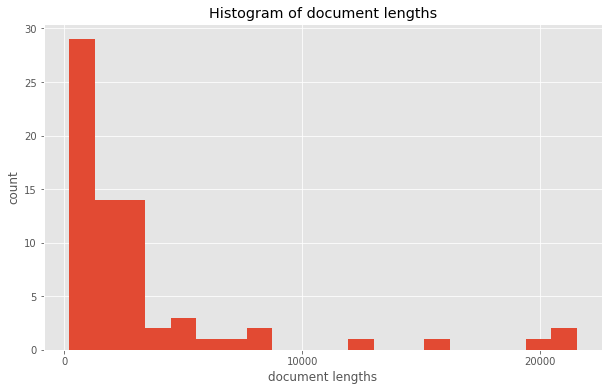

In [517]:
fig, ax = plt.subplots(figsize=(10, 6))   # make the plot larger
plot_doc_lengths_hist(fig, ax, corpus_filtered_docs, y_log=False, bins=20)  # use 20 bins
ax.set_xticks(range(0, 25000, 10000))    # set x axis ticks and range
plt.show();

In [518]:
from tmtoolkit.tokenseq import token_match

In [519]:
# first 20 tokens of document "NewsArticles-1100"
doc_snippet = corpus_filtered_docs['DI_CGI-state-of-ai-for-gov']['token'][:20]
# get all tokens that match "to*"
matches = token_match('skill*', doc_snippet, match_type='glob')

# show pair-wise results
list(zip(doc_snippet, matches))

[('report', False),
 ('ai', False),
 ('institute', False),
 ('center', False),
 ('insight', False),
 ('scale', False),
 ('ai', False),
 ('reach', False),
 ('height', False),
 ('enterprisewide', False),
 ('adoption', False),
 ('ai', False),
 ('ai', False),
 ('institute', False),
 ('ai', False),
 ('institute', False),
 ('help', False),
 ('organization', False),
 ('connect', False),
 ('different', False)]

In [520]:
from tmtoolkit.corpus import ngrams

In [521]:
ngrams(corpus_filtered_docs, n=2)['DI_CGI-state-of-ai-for-gov']

['report ai',
 'ai institute',
 'institute center',
 'center insight',
 'insight scale',
 'scale ai',
 'ai reach',
 'reach height',
 'height enterprisewide',
 'enterprisewide adoption',
 'adoption ai',
 'ai ai',
 'ai institute',
 'institute ai',
 'ai institute',
 'institute help',
 'help organization',
 'organization connect',
 'connect different',
 'different dimension',
 'dimension robust',
 'robust highly',
 'highly dynamic',
 'dynamic rapidly',
 'rapidly evolve',
 'evolve ai',
 'ai ecosystem',
 'ecosystem ai',
 'ai institute',
 'institute lead',
 'lead conversation',
 'conversation apply',
 'apply ai',
 'ai innovation',
 'innovation industry',
 'industry cut',
 'cut edge',
 'edge insight',
 'insight promote',
 'promote human',
 'human machine',
 'machine collaboration',
 'collaboration age',
 'age withtm',
 'withtm ai',
 'ai institute',
 'institute aim',
 'aim promote',
 'promote dialogue',
 'dialogue development',
 'development artificial_intelligence',
 'artificial_intelligence s

In [522]:
from tmtoolkit.corpus import corpus_ngramify

In [523]:
corpus_bigrams = corpus_ngramify(corpus_filtered, n=2, inplace=False)

In [275]:
?corpus_ngramify

In [276]:
from tmtoolkit.corpus import dtm


In [277]:
dtm(corpus_filtered, as_table=True)

AssertionError: 

In [85]:
from tmtoolkit.corpus import save_corpus_to_picklefile

print_summary(corpus_norm)

save_corpus_to_picklefile(corpus_filtered, '/home/user/Downloads/corpus_filtered.pickle')

Corpus with 75 documents in English
> 3 Things AI Can Already Do for Your Company (516 tokens): AI and Machine Learning  Artificial Intelligence f...
> 7,736 Hours Saved with Alteryx - Alteryx Community (1141 tokens): 62022  304 pm  7736 hour save with Alteryx  Altery...
> Accenture-ERP-Report-2020 (8367 tokens): 2020 ERP trend  base on the UK ERP Trends Survey b...
> 8-ai-trends-transforming-the-enterprise (7582 tokens): AI transform  the enterprise  8 key AI adoption tr...
> 718813-the-ai-crunch-demands-practical-responses-a-gartner-trend-insight-report (3418 tokens): the AI Crunch demand Practical Responses  a Gartne...
> Accenture-AI-Momentum-2018 (7290 tokens): AI MOMENTUM  MATURITY   MODELS for success  base o...
> Accenture-Unleashing-Exponential-Evolution-PDF (6421 tokens): 2019 ERP trend  base on the UK ERP Trends Survey b...
> Accenture-Built-to-Scale-PDF-Report (5998 tokens): provocative thinking  transformative insight   tan...
> Andrew Ng_ Why AI Is the New Electricity _ S

In [278]:
from tmtoolkit.bow.bow_stats import doc_lengths


In [ ]:
doc_lengths(mat)

In [12]:
from copy import copy
from tmtoolkit.corpus import filter_clean_tokens, remove_common_tokens, remove_uncommon_tokens

In [16]:
??remove_common_tokens

In [280]:
from tmtoolkit.corpus import filter_for_pos

In [524]:
corp_bigger = copy(corpus_filtered_docs)

filter_clean_tokens(corp_bigger, remove_shorter_than=2)
remove_common_tokens(corp_bigger, df_threshold=0.85)
remove_uncommon_tokens(corp_bigger, df_threshold=0.05)

print_summary(corp_bigger)

Corpus with 71 documents in English
> 3 Things AI Can Already Do for Your Company (157 tokens): machine_learning artificial_intelligence real worl...
> 7,736 Hours Saved with Alteryx - Alteryx Community (312 tokens): 62022 pm hour save community community science eng...
> Accenture-ERP-Report-2020 (2757 tokens): erp trend base uk erp trends survey accenture sap ...
> 8-ai-trends-transforming-the-enterprise (2639 tokens): transform enterprise key adoption trend introducti...
> 718813-the-ai-crunch-demands-practical-responses-a-gartner-trend-insight-report (1257 tokens): crunch demand practical trend insight report publi...
> Accenture-AI-Momentum-2018 (2161 tokens): momentum maturity models success base findings glo...
> Accenture-Unleashing-Exponential-Evolution-PDF (2258 tokens): erp trend base uk erp trends survey accenture sap ...
> Accenture-Built-to-Scale-PDF-Report (2050 tokens): thinking transformative insight tangible outcome s...
> Andrew Ng_ Why AI Is the New Electricity _ St

In [525]:
?filter_for_pos

In [526]:
corp_smaller = copy(corpus_filtered_docs)

filter_for_pos(corp_smaller, 'N')
filter_clean_tokens(corp_smaller, remove_shorter_than=2)
remove_common_tokens(corp_smaller, df_threshold=0.8)
remove_uncommon_tokens(corp_smaller, df_threshold=0.1)

print_summary(corp_smaller)

Corpus with 71 documents in English
> 3 Things AI Can Already Do for Your Company (86 tokens): machine_learning artificial_intelligence world tho...
> 7,736 Hours Saved with Alteryx - Alteryx Community (159 tokens): pm hour community community science search use_cas...
> Accenture-ERP-Report-2020 (1391 tokens): erp trend uk erp trends survey accenture sap group...
> 8-ai-trends-transforming-the-enterprise (1441 tokens): enterprise adoption introduction state deployment ...
> 718813-the-ai-crunch-demands-practical-responses-a-gartner-trend-insight-report (734 tokens): trend insight report march analyst intelligence bo...
> Accenture-AI-Momentum-2018 (1037 tokens): momentum maturity success findings global executiv...
> Accenture-Unleashing-Exponential-Evolution-PDF (1197 tokens): erp trend uk erp trends survey accenture sap group...
> Accenture-Built-to-Scale-PDF-Report (1043 tokens): thinking transformative insight outcome scale agil...
> Andrew Ng_ Why AI Is the New Electricity _ Stan

In [527]:
from tmtoolkit.corpus import dtm

dtm_bg, doc_labels_bg, vocab_bg = dtm(corp_bigger, return_doc_labels=True, return_vocab=True)
dtm_sm, doc_labels_sm, vocab_sm = dtm(corp_smaller, return_doc_labels=True, return_vocab=True)

del corp_bigger, corp_smaller  # don't need these any more

dtm_bg, dtm_sm

(<71x3410 sparse matrix of type '<class 'numpy.int32'>'
 	with 45981 stored elements in Compressed Sparse Row format>,
 <71x1098 sparse matrix of type '<class 'numpy.int32'>'
 	with 20582 stored elements in Compressed Sparse Row format>)

In [528]:
import logging
import warnings
from tmtoolkit.utils import disable_logging
from tmtoolkit.topicmod.tm_lda import compute_models_parallel

# disable tmtoolkit logging for now (too much output)
disable_logging()

In [529]:
from tmtoolkit.topicmod import tm_lda

tm_lda.AVAILABLE_METRICS

('loglikelihood',
 'cao_juan_2009',
 'arun_2010',
 'coherence_mimno_2011',
 'griffiths_2004',
 'held_out_documents_wallach09',
 'coherence_gensim_u_mass',
 'coherence_gensim_c_v',
 'coherence_gensim_c_uci',
 'coherence_gensim_c_npmi')

In [530]:
tm_lda.DEFAULT_METRICS


('cao_juan_2009', 'coherence_mimno_2011')

In [531]:
from tmtoolkit.topicmod.tm_lda import evaluate_topic_models
from tmtoolkit.topicmod.evaluate import results_by_parameter


In [407]:
import numpy as np

In [408]:
import matplotlib.pyplot as plt   # for plotting the results
plt.style.use('ggplot')

# for loading the data:
from tmtoolkit.utils import unpickle_file
# for model evaluation with the lda package:
from tmtoolkit.topicmod import tm_lda
# for constructing the evaluation plot:
from tmtoolkit.topicmod.evaluate import results_by_parameter
from tmtoolkit.topicmod.visualize import plot_eval_results

In [409]:
var_params = [{'n_topics': k, 'alpha': 1/k}
               for k in range(2, 4, 1)]
var_params

[{'n_topics': 2, 'alpha': 0.5}, {'n_topics': 3, 'alpha': 0.3333333333333333}]

In [410]:
var_params = {'n_topics': 4, 'alpha': 1/4}

In [411]:

const_params = {
    'n_iter': 1,
    'random_state': 45,  # to make results reproducible
    'eta': 0.1,                # sometimes also called "beta"
}

In [412]:
dtms = {
    'bigger': dtm_bg,
    'smaller': dtm_sm
}

# and fixed hyperparameters
lda_params = {
    'n_topics': 10,
    'n_iter': 100,
    'random_state': 20191122  # to make results reproducible
}

models = compute_models_parallel(dtms, constant_parameters=lda_params)
models

INFO:lda:n_documents: 63
INFO:lda:n_documents: 63
INFO:lda:vocab_size: 1206
INFO:lda:n_words: 86679
INFO:lda:vocab_size: 3337
INFO:lda:n_words: 168477
INFO:lda:n_topics: 10
INFO:lda:n_iter: 100
INFO:lda:n_topics: 10
INFO:lda:n_iter: 100
INFO:lda:<0> log likelihood: -809345
INFO:lda:<10> log likelihood: -628893
INFO:lda:<20> log likelihood: -603550
INFO:lda:<30> log likelihood: -596543
INFO:lda:<40> log likelihood: -592601
INFO:lda:<50> log likelihood: -589829
INFO:lda:<60> log likelihood: -587952
INFO:lda:<70> log likelihood: -587094
INFO:lda:<80> log likelihood: -586708
INFO:lda:<90> log likelihood: -585516
INFO:lda:<99> log likelihood: -585095
INFO:lda:<0> log likelihood: -1715911
INFO:lda:<10> log likelihood: -1396384
INFO:lda:<20> log likelihood: -1325402
INFO:lda:<30> log likelihood: -1305511
INFO:lda:<40> log likelihood: -1296760
INFO:lda:<50> log likelihood: -1290158
INFO:lda:<60> log likelihood: -1286856
INFO:lda:<70> log likelihood: -1283890
INFO:lda:<80> log likelihood: -1281

defaultdict(list,
            {'smaller': [({'n_topics': 10,
                'n_iter': 100,
                'random_state': 20191122},
               <lda.lda.LDA at 0x7fe634c5ec10>)],
             'bigger': [({'n_topics': 10,
                'n_iter': 100,
                'random_state': 20191122},
               <lda.lda.LDA at 0x7fe638b687c0>)]})

In [413]:
from tmtoolkit.topicmod.model_io import print_ldamodel_topic_words

model_sm = models['smaller'][0][1]
print_ldamodel_topic_words(model_sm.topic_word_, vocab_sm, top_n=3)

topic_1
> #1. percent (0.050848)
> #2. respondent (0.039871)
> #3. adoption (0.034250)
topic_2
> #1. system (0.033174)
> #2. vision (0.029134)
> #3. way (0.023892)
topic_3
> #1. employee (0.056908)
> #2. role (0.030554)
> #3. worker (0.025921)
topic_4
> #1. erp (0.131416)
> #2. market (0.051619)
> #3. software (0.043016)
topic_5
> #1. analytic (0.077370)
> #2. problem (0.028694)
> #3. use_case (0.023143)
topic_6
> #1. institute (0.041501)
> #2. consumer (0.024209)
> #3. state (0.024209)
topic_7
> #1. learning (0.073858)
> #2. impact (0.072635)
> #3. intelligence (0.067500)
topic_8
> #1. learning (0.035263)
> #2. technique (0.033389)
> #3. algorithm (0.032287)
topic_9
> #1. enterprise (0.044755)
> #2. leader (0.040240)
> #3. capability (0.021638)
topic_10
> #1. risk (0.058377)
> #2. firm (0.030066)
> #3. implementation (0.029599)


In [414]:
model_bg = models['bigger'][0][1]
print_ldamodel_topic_words(model_bg.topic_word_, vocab_bg, top_n=3)

topic_1
> #1. deploy (0.018413)
> #2. role (0.017279)
> #3. skill (0.015605)
topic_2
> #1. percent (0.021982)
> #2. machine_learning (0.020730)
> #3. investment (0.019751)
topic_3
> #1. case (0.022660)
> #2. volume (0.018169)
> #3. study (0.017863)
topic_4
> #1. respondent (0.030974)
> #2. risk (0.027333)
> #3. high (0.022844)
topic_5
> #1. service (0.018439)
> #2. enterprise (0.015998)
> #3. key (0.015894)
topic_6
> #1. analytic (0.034637)
> #2. use_case (0.022093)
> #3. value (0.020574)
topic_7
> #1. employee (0.019409)
> #2. power (0.016644)
> #3. digital (0.015705)
topic_8
> #1. erp (0.043041)
> #2. cloud (0.037058)
> #3. market (0.029048)
topic_9
> #1. organization (0.054232)
> #2. scale (0.032251)
> #3. team (0.019928)
topic_10
> #1. organizational (0.051616)
> #2. impact (0.044766)
> #3. strategy (0.044447)


In [297]:
var_params = [{'alpha': 1/(10**x)} for x in range(1, 5)]

const_params = {
    'n_iter': 500,
    'n_topics': 10,
    'random_state': 20191122  # to make results reproducible
}

models = compute_models_parallel(dtm_sm,  # smaller DTM
                                 varying_parameters=var_params,
                                 constant_parameters=const_params)
models

INFO:lda:n_documents: 75
INFO:lda:vocab_size: 1109
INFO:lda:n_words: 94024
INFO:lda:n_documents: 75
INFO:lda:n_topics: 10
INFO:lda:n_iter: 500
INFO:lda:vocab_size: 1109
INFO:lda:n_words: 94024
INFO:lda:n_topics: 10
INFO:lda:n_iter: 500
INFO:lda:<0> log likelihood: -863172
INFO:lda:<0> log likelihood: -864607
INFO:lda:<10> log likelihood: -676858
INFO:lda:<10> log likelihood: -677925
INFO:lda:<20> log likelihood: -648914
INFO:lda:<20> log likelihood: -651316
INFO:lda:<30> log likelihood: -641236
INFO:lda:<30> log likelihood: -644176
INFO:lda:<40> log likelihood: -636562
INFO:lda:<40> log likelihood: -640675
INFO:lda:<50> log likelihood: -633492
INFO:lda:<50> log likelihood: -636836
INFO:lda:<60> log likelihood: -631950
INFO:lda:<60> log likelihood: -635589
INFO:lda:<70> log likelihood: -630721
INFO:lda:<70> log likelihood: -633850
INFO:lda:<80> log likelihood: -630318
INFO:lda:<80> log likelihood: -632203
INFO:lda:<90> log likelihood: -628592
INFO:lda:<90> log likelihood: -631149
INFO:l

[({'alpha': 0.1, 'n_iter': 500, 'n_topics': 10, 'random_state': 20191122},
  <lda.lda.LDA at 0x7fe638cadac0>),
 ({'alpha': 0.01, 'n_iter': 500, 'n_topics': 10, 'random_state': 20191122},
  <lda.lda.LDA at 0x7fe62a0d4f70>),
 ({'alpha': 0.001, 'n_iter': 500, 'n_topics': 10, 'random_state': 20191122},
  <lda.lda.LDA at 0x7fe62a0d4670>),
 ({'alpha': 0.0001, 'n_iter': 500, 'n_topics': 10, 'random_state': 20191122},
  <lda.lda.LDA at 0x7fe62a0d42e0>)]

In [415]:
var_params = [{'n_topics': k, 'alpha': 1/k}
               for k in range(2, 50, 5)]
var_params

[{'n_topics': 2, 'alpha': 0.5},
 {'n_topics': 7, 'alpha': 0.14285714285714285},
 {'n_topics': 12, 'alpha': 0.08333333333333333},
 {'n_topics': 17, 'alpha': 0.058823529411764705},
 {'n_topics': 22, 'alpha': 0.045454545454545456},
 {'n_topics': 27, 'alpha': 0.037037037037037035},
 {'n_topics': 32, 'alpha': 0.03125},
 {'n_topics': 37, 'alpha': 0.02702702702702703},
 {'n_topics': 42, 'alpha': 0.023809523809523808},
 {'n_topics': 47, 'alpha': 0.02127659574468085}]

In [416]:
from tmtoolkit.topicmod import tm_lda

tm_lda.AVAILABLE_METRICS

('loglikelihood',
 'cao_juan_2009',
 'arun_2010',
 'coherence_mimno_2011',
 'griffiths_2004',
 'held_out_documents_wallach09',
 'coherence_gensim_u_mass',
 'coherence_gensim_c_v',
 'coherence_gensim_c_uci',
 'coherence_gensim_c_npmi')

In [532]:
from tmtoolkit.topicmod.tm_lda import evaluate_topic_models
from tmtoolkit.topicmod.evaluate import results_by_parameter

const_params = {
    'n_iter': 100,
    'random_state': 20191122,  # to make results reproducible
    'eta': 0.1,                # sometimes also called "beta"
}

eval_results = evaluate_topic_models(dtm_bg,
                                     varying_parameters=var_params,
                                     constant_parameters=const_params,
                                     coherence_mimno_2011_top_n=10,
                                     coherence_mimno_2011_include_prob=True,
                                     return_models=True)
eval_results[:3]  # only show first three models

INFO:lda:n_documents: 71
INFO:lda:vocab_size: 3410
INFO:lda:n_documents: 71
INFO:lda:n_words: 175956
INFO:lda:vocab_size: 3410
INFO:lda:n_topics: 2
INFO:lda:n_words: 175956
INFO:lda:n_iter: 100
INFO:lda:n_topics: 7
INFO:lda:n_iter: 100
INFO:lda:<0> log likelihood: -1418109
INFO:lda:<10> log likelihood: -1356537
INFO:lda:<20> log likelihood: -1333219
INFO:lda:<0> log likelihood: -1664914
INFO:lda:<30> log likelihood: -1330191
INFO:lda:<40> log likelihood: -1328668
INFO:lda:<10> log likelihood: -1446624
INFO:lda:<50> log likelihood: -1327316
INFO:lda:<60> log likelihood: -1326978
INFO:lda:<20> log likelihood: -1395785
INFO:lda:<70> log likelihood: -1325836
INFO:lda:<80> log likelihood: -1325686
INFO:lda:<30> log likelihood: -1385522
INFO:lda:<90> log likelihood: -1325760
INFO:lda:<99> log likelihood: -1326410
INFO:lda:n_documents: 71
INFO:lda:vocab_size: 3410
INFO:lda:n_words: 175956
INFO:lda:n_topics: 12
INFO:lda:n_iter: 100
INFO:lda:<40> log likelihood: -1381877
INFO:lda:<50> log likel

[({'n_topics': 2,
   'alpha': 0.5,
   'n_iter': 100,
   'random_state': 20191122,
   'eta': 0.1},
  {'model': <lda.lda.LDA at 0x7fe637fe93d0>,
   'cao_juan_2009': 0.36856722945527076,
   'coherence_mimno_2011': -464.3113530081905}),
 ({'n_topics': 7,
   'alpha': 0.14285714285714285,
   'n_iter': 100,
   'random_state': 20191122,
   'eta': 0.1},
  {'model': <lda.lda.LDA at 0x7fe623fef6d0>,
   'cao_juan_2009': 0.24151006055733623,
   'coherence_mimno_2011': -420.5320133563837}),
 ({'n_topics': 12,
   'alpha': 0.08333333333333333,
   'n_iter': 100,
   'random_state': 20191122,
   'eta': 0.1},
  {'model': <lda.lda.LDA at 0x7fe623fef550>,
   'cao_juan_2009': 0.19368593607742687,
   'coherence_mimno_2011': -401.1501299353088})]

In [533]:
eval_results_by_topics = results_by_parameter(eval_results, 'n_topics')
eval_results_by_topics[:3]  # again only the first three models

[(2,
  {'model': <lda.lda.LDA at 0x7fe637fe93d0>,
   'cao_juan_2009': 0.36856722945527076,
   'coherence_mimno_2011': -464.3113530081905}),
 (7,
  {'model': <lda.lda.LDA at 0x7fe623fef6d0>,
   'cao_juan_2009': 0.24151006055733623,
   'coherence_mimno_2011': -420.5320133563837}),
 (12,
  {'model': <lda.lda.LDA at 0x7fe623fef550>,
   'cao_juan_2009': 0.19368593607742687,
   'coherence_mimno_2011': -401.1501299353088})]

/home/user/anaconda3/lib/python3.9/site-packages/tmtoolkit/topicmod/visualize.py:833: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(**subplots_adjust_kwargs)


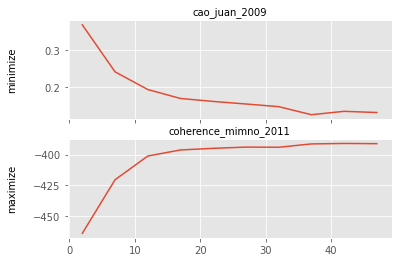

In [534]:
from tmtoolkit.topicmod.visualize import plot_eval_results

plot_eval_results(eval_results_by_topics);

In [535]:
best_tm = [m for k, m in eval_results_by_topics if k == 17][0]['model']
best_tm.n_topics, best_tm.alpha, best_tm.eta  # just to make sure

(17, 0.058823529411764705, 0.1)

In [536]:
from tmtoolkit.bow.bow_stats import doc_lengths
from tmtoolkit.topicmod.model_stats import generate_topic_labels_from_top_words

vocab_bg = np.array(vocab_bg)   # we need this to be an array

doc_lengths_bg = doc_lengths(dtm_bg)
topic_labels = generate_topic_labels_from_top_words(
    best_tm.topic_word_,
    best_tm.doc_topic_,
    doc_lengths_bg,
    np.array(vocab_bg),
    lambda_=0.6
)

topic_labels[:]  

array(['1_artificial_intelligence', '2_base', '3_skill', '4_services',
       '5_vision', '6_use_case', '7_scale', '8_reader', '9_state',
       '10_respondent', '11_worker', '12_erp', '13_algorithm',
       '14_organizational', '15_blog', '16_inc_andor', '17_62022'],
      dtype='<U25')

In [537]:
from tmtoolkit.topicmod.model_io import ldamodel_top_topic_words

top_topic_word = ldamodel_top_topic_words(best_tm.topic_word_,
                                          vocab_bg,
                                          row_labels=topic_labels)
top_topic_word[top_topic_word.index == '3_pm']

,rank_1,rank_2,rank_3,rank_4,rank_5,rank_6,rank_7,rank_8,rank_9,rank_10
topic,,,,,,,,,,


In [538]:
from tmtoolkit.topicmod.model_stats import marginal_topic_distrib

marg_topic = marginal_topic_distrib(best_tm.doc_topic_, doc_lengths_bg)
marg_topic

array([0.0802682 , 0.09577076, 0.12798928, 0.07169886, 0.06755461,
       0.08442294, 0.09537754, 0.0332228 , 0.03355626, 0.04396303,
       0.03496664, 0.02901762, 0.08139948, 0.02970441, 0.04228135,
       0.02248999, 0.02631624])

In [539]:
# np.argsort gives ascending order, hence reverse via [::-1]
topic_labels[np.argsort(marg_topic)[::-1][:]]

array(['3_skill', '2_base', '7_scale', '6_use_case', '13_algorithm',
       '1_artificial_intelligence', '4_services', '5_vision',
       '10_respondent', '15_blog', '11_worker', '9_state', '8_reader',
       '14_organizational', '12_erp', '17_62022', '16_inc_andor'],
      dtype='<U25')

In [540]:
from tmtoolkit.topicmod.model_stats import marginal_word_distrib

marg_word = marginal_word_distrib(best_tm.topic_word_, marg_topic)
vocab_bg[np.argsort(marg_word)[::-1][:17]]

array(['organization', 'model', 'analytic', 'value', 'scale', 'strategy',
       'leader', 'work', 'impact', 'global', 'digital', 'industry',
       'system', 'risk', 'survey', 'high', 'base'], dtype='<U23')

In [541]:
from tmtoolkit.topicmod.model_stats import most_probable_words, least_probable_words

most_probable_words(vocab_bg, best_tm.topic_word_,
                    best_tm.doc_topic_, doc_lengths_bg,
                    n=17)

array(['organization', 'model', 'analytic', 'value', 'scale', 'strategy',
       'leader', 'work', 'impact', 'global', 'digital', 'industry',
       'system', 'risk', 'survey', 'high', 'base'], dtype='<U23')

In [542]:
least_probable_words(vocab_bg, best_tm.topic_word_,
                     best_tm.doc_topic_, doc_lengths_bg,
                     n=10)

array(['dealer', 'clever', 'completeness', 'policies', 'chronic', 'on',
       'ent', 'swift', 'refinement', 'occasionally'], dtype='<U23')

In [543]:
from tmtoolkit.topicmod.model_stats import word_distinctiveness, \
    most_distinct_words, least_distinct_words

word_distinct = word_distinctiveness(best_tm.topic_word_, marg_topic)
word_distinct[:10]   # first 10 words in vocab

array([0.46967065, 1.89295921, 1.54706754, 2.64668696, 0.78389815,
       3.5434502 , 0.49247946, 1.36341457, 1.049145  , 0.69275734])

In [544]:
most_distinct_words(vocab_bg, best_tm.topic_word_,
                    best_tm.doc_topic_, doc_lengths_bg,
                    n=10)

array(['inc_andor', 'andor_affiliate', 'registered', 'polling', '62022',
       'erp', 'vote', 'sr', 'restrict', 'poll'], dtype='<U23')

In [545]:
least_distinct_words(vocab_bg, best_tm.topic_word_,
                     best_tm.doc_topic_, doc_lengths_bg,
                     n=10)

array(['steadily', 'official', 'area', 'settle', 'lead', 'urgency',
       'readiness', 'identify', 'blindly', 'fulfil'], dtype='<U23')

In [546]:
from tmtoolkit.topicmod.model_stats import topic_word_relevance

topic_word_rel = topic_word_relevance(best_tm.topic_word_, best_tm.doc_topic_,
                                      doc_lengths_bg, lambda_=0.6)
topic_word_rel

array([[-7.80251679, -4.80492097, -8.16794041, ..., -8.2791143 ,
        -7.85296265, -7.85286844],
       [-5.5777628 , -8.02258469, -8.3410817 , ..., -8.45225558,
        -8.02610394, -5.62811446],
       [-4.54695842, -8.3074571 , -8.6259541 , ..., -8.73712799,
        -8.31097635, -8.31088214],
       ...,
       [-7.1827365 , -7.22966312, -7.54816012, ..., -7.65933401,
        -7.23318236, -7.23308815],
       [-6.58930556, -6.63623218, -6.95472918, ..., -7.06590307,
        -6.63975143, -6.63965722],
       [-6.7349464 , -6.78187302, -7.10037003, ..., -7.21154391,
        -6.78539227, -6.78529806]])

In [547]:
topic_word_rel.shape

(17, 3410)

In [548]:
topic_labels[9]

'10_respondent'

In [549]:
from tmtoolkit.topicmod.model_stats import most_relevant_words_for_topic, \
    least_relevant_words_for_topic

most_relevant_words_for_topic(vocab_bg, topic_word_rel, topic=2, n=10)

array(['skill', 'develop', 'strategic', 'challenge', 'help',
       'professional', 'manage', 'create', 'large', 'drive'], dtype='<U23')

In [550]:
least_relevant_words_for_topic(vocab_bg, topic_word_rel, topic=9, n=10)

array(['leader', 'learning', 'help', 'research', 'create', 'build',
       'market', 'firm', 'solution', 'team'], dtype='<U23')

In [551]:
from tmtoolkit.topicmod.evaluate import metric_coherence_mimno_2011

# use top 20 words per topic for metric
coh = metric_coherence_mimno_2011(best_tm.topic_word_, dtm_bg, top_n=10, include_prob=True)
coh

array([-423.21866781, -425.76847175, -437.22864871, -403.75162879,
       -402.22160235, -383.54340667, -380.75019711, -414.60338103,
       -400.61922827, -363.91769374, -399.44573591, -378.30968536,
       -412.81062616, -327.89700383, -411.74573947, -339.98822588,
       -429.12804057])

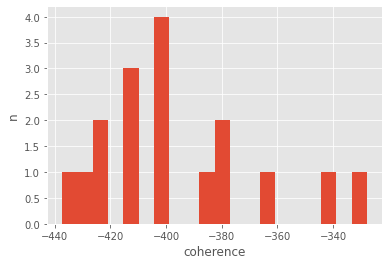

In [552]:
import matplotlib.pyplot as plt

plt.hist(coh, bins=20)
plt.xlabel('coherence')
plt.ylabel('n')
plt.show();

In [553]:
import numpy as np

top10_t_indices = np.argsort(coh)[::-1][:10]
bottom10_t_indices = np.argsort(coh)[:10]

topic_labels[top10_t_indices]

array(['14_organizational', '16_inc_andor', '10_respondent', '12_erp',
       '7_scale', '6_use_case', '11_worker', '9_state', '5_vision',
       '4_services'], dtype='<U25')

In [554]:
topic_labels[bottom10_t_indices]

array(['3_skill', '17_62022', '2_base', '1_artificial_intelligence',
       '8_reader', '13_algorithm', '15_blog', '4_services', '5_vision',
       '9_state'], dtype='<U25')

In [330]:
from tmtoolkit.topicmod.model_stats import filter_topics

In [555]:
found_topics = filter_topics(['inc_andor','blog','reader','62022','edition'], vocab_bg,
                             best_tm.topic_word_, top_n = 30,match_type='glob')
topic_labels[found_topics]


array(['8_reader', '9_state', '15_blog', '16_inc_andor', '17_62022'],
      dtype='<U25')

In [ ]:
?filter_topics


In [556]:
# using relevance matrix here and showing only the first 10 topics
ldamodel_top_topic_words(topic_word_rel, vocab_bg, top_n=8)[:10]

,rank_1,rank_2,rank_3,rank_4,rank_5,rank_6,rank_7,rank_8
topic,,,,,,,,
topic_1,artificial_intelligence (-1.696),digital (-1.78),institute (-1.883),frontier (-1.984),health (-2.039),global (-2.083),sector (-2.095),firm (-2.123)
topic_2,base (-1.99),project (-2.01),real (-2.176),survey (-2.219),good (-2.249),offer (-2.297),combine (-2.315),success (-2.319)
topic_3,skill (-2.011),develop (-2.121),strategic (-2.126),challenge (-2.32),help (-2.364),professional (-2.369),manage (-2.387),create (-2.4)
topic_4,services (-1.467),figure (-1.562),risk (-1.632),regulation (-1.76),implementation (-1.765),chapter (-1.815),firm (-1.842),organisation (-1.914)
topic_5,vision (-1.685),enterprise (-1.698),digital (-1.752),want (-1.782),pandemic (-1.836),twin (-1.836),ecosystem (-1.847),leader (-1.957)
topic_6,use_case (-1.323),value (-1.473),technique (-1.575),analytic (-1.734),sale (-1.929),product (-1.964),potential (-1.969),advanced (-2.071)
topic_7,scale (-1.165),organization (-1.256),analytic (-1.472),team (-1.778),leader (-1.8),achieve (-2.046),initiative (-2.173),strategy (-2.182)
topic_8,reader (-1.024),model (-1.116),volume (-1.342),prior (-1.366),radiologist (-1.368),specificity (-1.512),case (-1.534),sensitivity (-1.548)
topic_9,state (-0.9483),edition (-1.201),enterprise (-1.276),united (-1.281),market (-1.299),insights (-1.373),cognitive (-1.403),adopter (-1.407)


In [557]:
from tmtoolkit.topicmod.model_io import ldamodel_top_word_topics

top_word_topics = ldamodel_top_word_topics(topic_word_rel, vocab_bg,
                                           top_n=5, topic_labels=topic_labels)
top_word_topics[top_word_topics.index.isin(['risk', 'ERP', 'firms', 'NLP','skill','knowledge'])]

,rank_1,rank_2,rank_3,rank_4,rank_5
token,,,,,
knowledge,11_worker (-1.549),13_algorithm (-2.769),15_blog (-3.618),14_organizational (-3.837),7_scale (-4.003)
risk,4_services (-1.632),10_respondent (-1.977),3_skill (-2.619),8_reader (-2.626),9_state (-2.7)
skill,3_skill (-2.011),11_worker (-3.493),16_inc_andor (-3.587),10_respondent (-3.78),1_artificial_intelligence (-4.23)


In [558]:
uninform_topics = [7,14,15,16]
topic_labels[uninform_topics]

array(['8_reader', '15_blog', '16_inc_andor', '17_62022'], dtype='<U25')

In [559]:
from tmtoolkit.topicmod.model_stats import exclude_topics

new_doc_topic, new_topic_word, new_topic_mapping = \
    exclude_topics(uninform_topics, best_tm.doc_topic_,
                best_tm.topic_word_, return_new_topic_mapping=True)
new_doc_topic.shape, new_topic_word.shape

((71, 13), (13, 3410))

In [560]:
new_topic_labels = np.delete(topic_labels, uninform_topics)
new_topic_labels

array(['1_artificial_intelligence', '2_base', '3_skill', '4_services',
       '5_vision', '6_use_case', '7_scale', '9_state', '10_respondent',
       '11_worker', '12_erp', '13_algorithm', '14_organizational'],
      dtype='<U25')

In [561]:
from tmtoolkit.topicmod.model_io import ldamodel_top_doc_topics

ldamodel_top_doc_topics(new_doc_topic, doc_labels_bg, top_n=3,
                        topic_labels=new_topic_labels)[:5]

,rank_1,rank_2,rank_3
document,,,
3 Things AI Can Already Do for Your Company,2_base (0.3875),1_artificial_intelligence (0.2888),13_algorithm (0.2281)
"7,736 Hours Saved with Alteryx - Alteryx Community",2_base (0.5892),11_worker (0.1561),6_use_case (0.1425)
718813-the-ai-crunch-demands-practical-responses-a-gartner-trend-insight-report,2_base (0.3758),3_skill (0.2304),7_scale (0.1614)
8-ai-trends-transforming-the-enterprise,3_skill (0.5596),7_scale (0.1911),9_state (0.09598)
Accenture-AI-Momentum-2018,11_worker (0.4029),2_base (0.3729),10_respondent (0.1291)


In [562]:
from tmtoolkit.topicmod.model_io import ldamodel_top_topic_docs

ldamodel_top_topic_docs(new_doc_topic, doc_labels_bg, top_n=5,
                        topic_labels=new_topic_labels)[:10]

,rank_1,rank_2,rank_3,rank_4,rank_5
topic,,,,,
1_artificial_intelligence,MGI-Artificial-Intelligence-Discussion-paper (...,How AI can unlock a $127B opportunity by reduc...,3 Things AI Can Already Do for Your Company (0...,How AI Can Transform The Transportation Indust...,Andrew Ng_ Why AI Is the New Electricity _ Sta...
2_base,"7,736 Hours Saved with Alteryx - Alteryx Commu...",GartnerGÇÖs 2020 Magic Quadrant For Data Scien...,"Manufacturing smarter, safer vehicles with ana...",How AI Can Transform The Transportation Indust...,us-cfo-insights-internet-of-things-revenue gen...
3_skill,IBM Global AI Adoption Index 2022 (0.683),8-ai-trends-transforming-the-enterprise (0.5596),sep24ebrethenouxfkaramouzis_664465 (0.4425),dec16ssicular_814291 (0.4341),Will the Pandemic Accelerate Adoption of Artif...
4_services,ey-why-a-i-will-redefine-the-financial-service...,Ardila-2019-End-to-end-lung-cancer-screening-w...,Using Alteryx to help get employees back to wo...,IDC Forecasts Improved Growth for Global AI Ma...,IDC_White_Paper_Microsoft_Interim Draft 05 15 ...
5_vision,apr14alitanssicularfchoudharyamullen_733347 (0...,Accenture-Tech-Vision-2021-Full-Report (0.6104),apr22wandrewssvashisthcidoine_842706 (0.5579),Experimenting with robots for grocery picking ...,gx-artificial-intelligence-and-data (0.2423)
6_use_case,Notes-from-the-AI-frontier-Insights-from-hundr...,licenced_google_idc_marketscape_visionai_apac ...,"Manufacturing smarter, safer vehicles with ana...",bain-brief_artificial-intelligence-in-the-cons...,Announcing automated ML capability in Azure Ma...
7_scale,breaking-away-the-secrets-to-scaling-analytics...,State-of-AI_Report_Web-capgemini (0.4264),winning-with-ai-is-a-state-of-mind-mckinsey (0...,Accenture-Built-to-Scale-PDF-Report (0.4123),ten-red-flags-signaling-your-analytics-program...
9_state,DELO-6418_State of AI 2020_KS4 (0.8801),"Top 10 ERP Software Vendors, Market Size and M...",IDC Forecasts Improved Growth for Global AI Ma...,deloitte-cn-dtt-thriving-in-the-era-of-persuas...,DI_State-of-AI-in-the-enterprise-2nd-ed (0.2245)
10_respondent,Global-survey-The-state-of-AI-in-2021 (0.8705),global-ai-survey-ai-proves-its-worth-but-few-s...,notes-from-the-ai-frontier-ai-adoption-advance...,dec16ssicular_814291 (0.3227),may26fkaramouzisupdated_608384 (0.2069)


In [563]:
from tmtoolkit.topicmod.model_io import ldamodel_full_topic_words

df_topic_word = ldamodel_full_topic_words(new_topic_word,
                                          vocab_bg,
                                          row_labels=new_topic_labels)
# displaying only the first 5 topics with 10 tokens
# from sorted vocabulary list (tokens 120 to 129)
df_topic_word

,_topic,10–20,1–3,2x,3d,3x,62022,aaron,abandon,ability,...,wwwaccenturecom,wwwdeloittecomabout,wwwdeloittecominsights,yes,yield,york,young,zealand,zone,ﬁrst
0,1_artificial_intelligence,0.000007,0.000145,0.000007,0.000007,0.000076,0.000007,0.000007,0.000007,0.000007,...,0.000007,0.000007,0.000007,0.000007,0.001459,0.000007,0.000007,0.000007,0.000007,0.000007
1,2_base,0.000064,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.003146,...,0.000006,0.000006,0.000006,0.000006,0.000122,0.000006,0.000006,0.000006,0.000006,0.000064
2,3_skill,0.000179,0.000004,0.000004,0.000004,0.000004,0.000004,0.000092,0.000004,0.002978,...,0.000004,0.000004,0.000004,0.000004,0.000004,0.000223,0.000004,0.000004,0.000004,0.000004
3,4_services,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,...,0.000008,0.000008,0.000008,0.000008,0.000625,0.000162,0.000008,0.000008,0.000008,0.000008
4,5_vision,0.000008,0.000008,0.000008,0.000417,0.000172,0.000008,0.000008,0.000008,0.000008,...,0.000172,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000417,0.000008
5,6_use_case,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,0.000138,0.000665,...,0.000007,0.000007,0.000007,0.000007,0.000007,0.000204,0.000007,0.000072,0.000007,0.000007
6,7_scale,0.000006,0.000006,0.000882,0.000006,0.000123,0.000064,0.000181,0.000006,0.000006,...,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000181
7,9_state,0.000016,0.000657,0.000016,0.000016,0.000176,0.000016,0.000016,0.000016,0.000016,...,0.000016,0.000977,0.000657,0.000016,0.000016,0.000336,0.000336,0.000016,0.000016,0.000016
8,10_respondent,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.002117,...,0.000012,0.000012,0.000012,0.000012,0.000632,0.000012,0.000012,0.000012,0.000012,0.000012
9,11_worker,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000323,0.000015,...,0.000015,0.000015,0.000015,0.005869,0.000015,0.000015,0.000169,0.003096,0.000015,0.000015


In [564]:
from tmtoolkit.topicmod.model_io import ldamodel_full_doc_topics

df_doc_topic = ldamodel_full_doc_topics(new_doc_topic,
                                        doc_labels_bg,
                                        topic_labels=new_topic_labels)
# displaying only the first 3 documents with the first
# 5 topics
df_doc_topic.iloc[:, :10]

,_doc,1_artificial_intelligence,2_base,3_skill,4_services,5_vision,6_use_case,7_scale,9_state,10_respondent
0,3 Things AI Can Already Do for Your Company,0.288839,0.387500,0.000446,0.000446,0.015625,0.000446,0.000446,0.076339,0.000446
1,"7,736 Hours Saved with Alteryx - Alteryx Commu...",0.007166,0.589172,0.000398,0.000398,0.000398,0.142516,0.000398,0.000398,0.000398
2,718813-the-ai-crunch-demands-practical-respons...,0.000072,0.375797,0.230435,0.000072,0.000072,0.000072,0.161449,0.090000,0.093696
3,8-ai-trends-transforming-the-enterprise,0.002920,0.002092,0.559632,0.005815,0.092672,0.006228,0.191110,0.095981,0.014087
4,Accenture-AI-Momentum-2018,0.000027,0.372871,0.003265,0.000027,0.003265,0.000027,0.088381,0.000027,0.129088
...,...,...,...,...,...,...,...,...,...,...
66,temp,0.000030,0.354228,0.000030,0.000030,0.000030,0.000030,0.090720,0.000533,0.134554
67,ten-red-flags-signaling-your-analytics-program...,0.050839,0.024846,0.104007,0.000035,0.008896,0.199117,0.391111,0.000035,0.028391
68,us-cfo-insights-internet-of-things-revenue gen...,0.013384,0.449743,0.093450,0.022725,0.052749,0.188861,0.044076,0.128812,0.000039
69,what-ai-can-and-cant-do-yet-for-your-business,0.062951,0.047631,0.076628,0.000032,0.000032,0.206842,0.040519,0.000032,0.000032


In [565]:
from tmtoolkit.topicmod.model_io import print_ldamodel_doc_topics

# subsetting new_doc_topic and doc_labels to get only the first
# five documents
print_ldamodel_doc_topics(new_doc_topic[:5, :], doc_labels_bg[:5],
                          val_labels=new_topic_labels)

3 Things AI Can Already Do for Your Company
> #1. 2_base (0.387500)
> #2. 1_artificial_intelligence (0.288839)
> #3. 13_algorithm (0.228125)
7,736 Hours Saved with Alteryx - Alteryx Community
> #1. 2_base (0.589172)
> #2. 11_worker (0.156051)
> #3. 6_use_case (0.142516)
718813-the-ai-crunch-demands-practical-responses-a-gartner-trend-insight-report
> #1. 2_base (0.375797)
> #2. 3_skill (0.230435)
> #3. 7_scale (0.161449)
8-ai-trends-transforming-the-enterprise
> #1. 3_skill (0.559632)
> #2. 7_scale (0.191110)
> #3. 9_state (0.095981)
Accenture-AI-Momentum-2018
> #1. 11_worker (0.402939)
> #2. 2_base (0.372871)
> #3. 10_respondent (0.129088)


In [583]:
from tmtoolkit.topicmod.visualize import generate_wordclouds_for_topic_words

# some options for wordcloud output
img_w = 400   # image width
img_h = 300   # image height

topic_clouds = generate_wordclouds_for_topic_words(
    new_topic_word, vocab_bg,
    top_n=20, topic_labels=new_topic_labels,
    width=img_w, height=img_h
)

# show all generated word clouds
topic_clouds.keys()

dict_keys(['1_artificial_intelligence', '2_base', '3_skill', '4_services', '5_vision', '6_use_case', '7_scale', '9_state', '10_respondent', '11_worker', '12_erp', '13_algorithm', '14_organizational'])

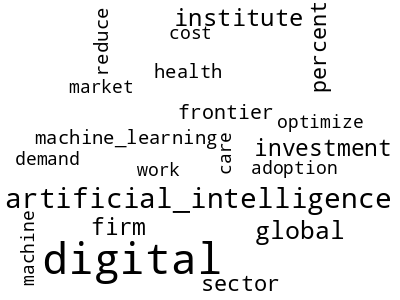

In [584]:
topic_clouds['1_artificial_intelligence']

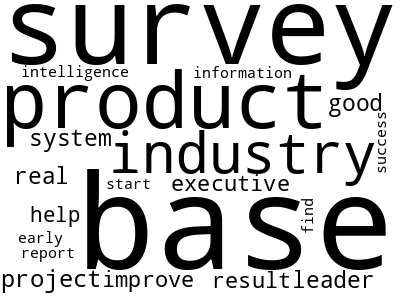

In [585]:
topic_clouds['2_base']

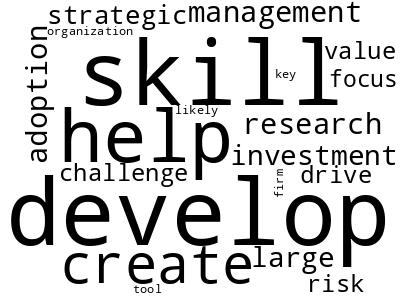

In [586]:
topic_clouds['3_skill']

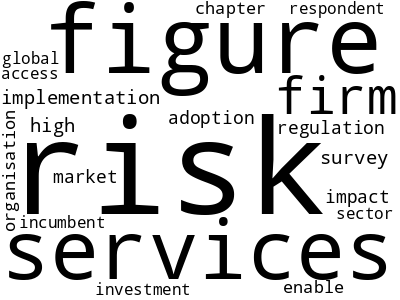

In [587]:
topic_clouds['4_services']

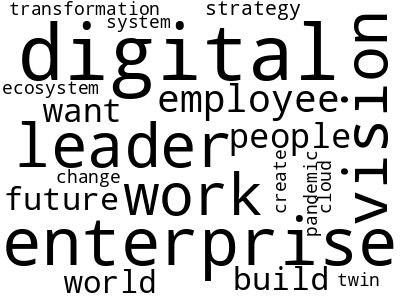

In [588]:
topic_clouds['5_vision']

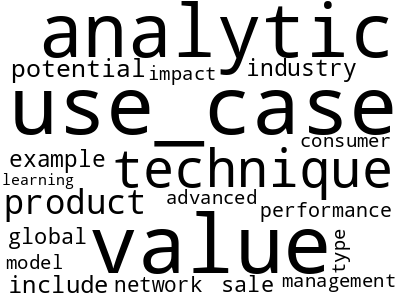

In [589]:
topic_clouds['6_use_case']

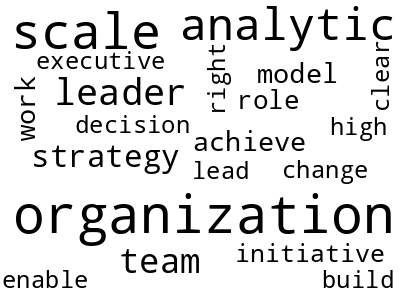

In [590]:
topic_clouds['7_scale']

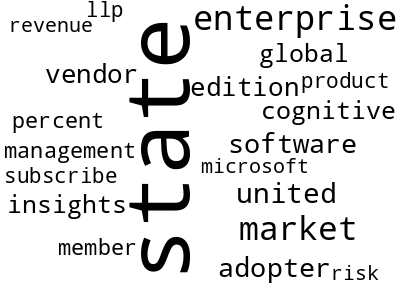

In [591]:
topic_clouds['9_state']

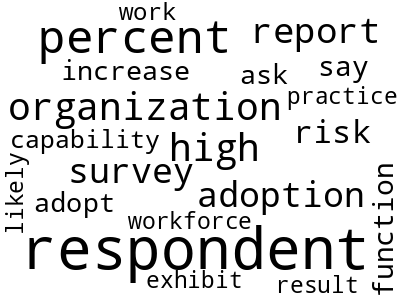

In [592]:
topic_clouds['10_respondent']

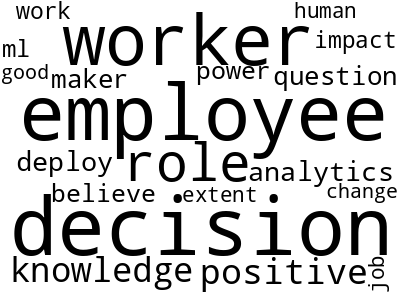

In [593]:
topic_clouds['11_worker']

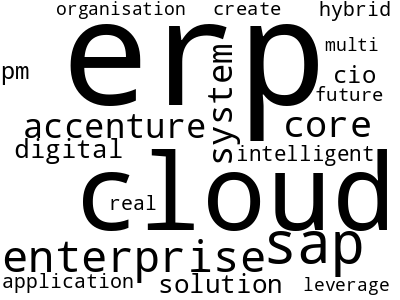

In [594]:
topic_clouds['12_erp']

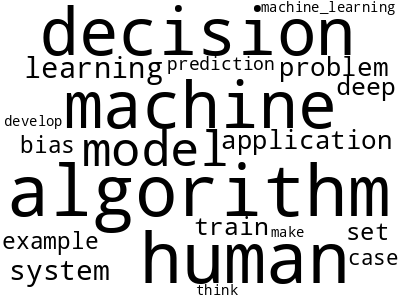

In [595]:
topic_clouds['13_algorithm']

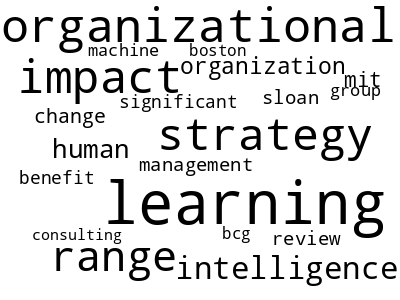

In [596]:
topic_clouds['14_organizational']

In [597]:
from tmtoolkit.topicmod.visualize import generate_wordclouds_for_document_topics

doc_clouds = generate_wordclouds_for_document_topics(
    new_doc_topic, doc_labels_bg, topic_labels=new_topic_labels,
    top_n=5, width=img_w, height=img_h)

# show only the first 5 documents for
# which word clouds were generated
list(doc_clouds.keys())[:5]

['3 Things AI Can Already Do for Your Company',
 '7,736 Hours Saved with Alteryx - Alteryx Community',
 '718813-the-ai-crunch-demands-practical-responses-a-gartner-trend-insight-report',
 '8-ai-trends-transforming-the-enterprise',
 'Accenture-AI-Momentum-2018']

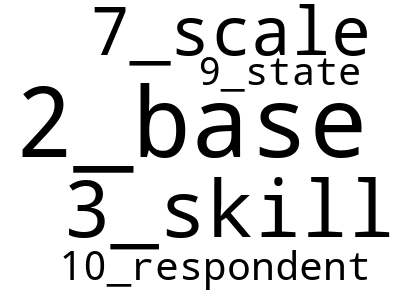

In [598]:
doc_clouds['718813-the-ai-crunch-demands-practical-responses-a-gartner-trend-insight-report']

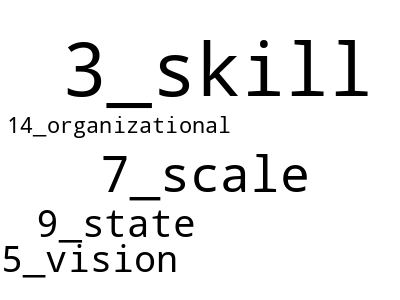

In [599]:
doc_clouds['8-ai-trends-transforming-the-enterprise']

In [600]:
from tmtoolkit.topicmod.visualize import write_wordclouds_to_folder

write_wordclouds_to_folder(topic_clouds, '/home/user/Downloads/topic_clouds')

In [ ]:
from collections import defaultdict
from gensim import corpora

In [ ]:
stoplist = set('for a of the and to in'.split())
texts = [
    [word for word in corp.lower().split() if word not in stoplist]
    for corp in corp
]

# remove words that appear only once
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

texts = [
    [token for token in text if frequency[token] > 1]
    for text in texts
]

dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

eval_results = evaluate_topic_models(dtm_bg,
                                     varying_parameters=var_params,
                                     constant_parameters=const_params,
                                     coherence_mimno_2011_top_n=4,
                                     coherence_mimno_2011_include_prob=True,
                                     return_models=True)
eval_results[:3]  # only show first three models

In [ ]:
docs_path = files
ignore_words = ['Fig','like','e.g.','i.e.','one']
all_keywords = []

for filename in os.listdir(docs_path):
    filepath = os.path.join(docs_path, filename)
    if os.path.isfile(filepath) and filename.endswith('.pdf'):
        print(f'Parsing file: {filename}')
        try:
            file_text = read_file(filepath)
            keywords = extract_keywords(file_text,min_word_length = 3, ignore_words = ignore_words)
            all_keywords.extend(keywords)
        except:
            print(f'ERROR!!! Unable to parse file: {filename}. Ignoring file!!')
        

print(f'Completed reading all pdf files in folder:{docs_path}')

In [ ]:
create_word_cloud(all_keywords, bg = 'black', cmap = 'Set2',random_state = 100, width = 1000, height = 1000)

In [ ]:
from tmtoolkit.preprocess import TMPreproc

In [ ]:
import tmtoolkit.corpus

In [ ]:
from tmtoolkit.corpus import print_summary

In [ ]:
# Import  Natural Language Toolkit Library
import nltk
# Importing Operator Module
import operator

from nltk.corpus import PlaintextCorpusReader

In [ ]:
# Root folder where the text files are located
corpus_root = "C:/Users/ASUS/Desktop/RA ESCP/Research Papers/topic modeling - ERP AI-Enterprise/Whitepapers"

In [ ]:
# List down the IDs of the files read from the local storage
filelists.fileids()

# Read the text from specific file,
# like plaintext corpora support methods to read the corpus as 
# raw text, a list of words, a list of sentences, or a list of paragraphs.
rawlist = filelists.raw('text.txt')
wordslist = filelists.words('text.txt')
sentslist = filelists.sents('text.txt')
paraslist = filelists.paras('text.txt')

print("a list of filenames:")
print(filelists.fileids(),'\n')
print("a list of words:")
print(wordslist,'\n')
print("a list of sentences:")
print(sentslist,'\n')
print("a list of paragraphs:")
print(paraslist,'\n')
print("a list of raw text:")
print(rawlist,'\n')

In [ ]:
list(uploaded)

In [ ]:
with open("lorem_ipsum.pdf", "rb") as f:
    pdf = pdftotext.PDF(f)

In [ ]:
corp = Corpus.from_folder('C:/Users/ASUS/Desktop/RA ESCP/Research Papers/topic modeling - ERP AI-Enterprise/Whitepapers')


In [ ]:
def load_data(file):
    with open (file, "r", encoding="utf-8") as f:
        data = json.load(f)
    return (data)

def write_data(file, data):
    with open (file, "w", encoding="utf-8") as f:
        json.dump(data, f, indent=4)

def remove_stops(text, stops):
    text = re.sub(r"AC\/\d{1,4}\/\d{1,4}", "", text)
    words = text.split()
    final = []
    for word in words:
        if word not in stops:
            final.append(word)
    final = " ".join(final)
    final = final.translate(str.maketrans("", "", string.punctuation))
    final = "".join([i for i in final if not i.isdigit()])
    while "  " in final:
        final = final.replace("  ", " ")
    return (final)

def clean_docs(docs):
    stops = stopwords.words("english")
    months = load_data("data/months.json")
    stops = stops+months
    final = []
    for doc in docs:
        clean_doc = remove_stops(doc, stops)
        final.append(clean_doc)
    return (final)

descriptions = load_data("data/trc_dn.json")["descriptions"]
names = load_data("data/trc_dn.json")["names"]

# print (descriptions[0])

cleaned_docs = clean_docs(descriptions)
# print (cleaned_docs[0])

vectorizer = TfidfVectorizer(
                                lowercase=True,
                                max_features=100,
                                max_df=0.8,
                                min_df=5,
                                ngram_range = (1,3),
                                stop_words = "english"

                            )

vectors = vectorizer.fit_transform(cleaned_docs)

feature_names = vectorizer.get_feature_names()

dense = vectors.todense()
denselist = dense.tolist()

all_keywords = []

for description in denselist:
    x=0
    keywords = []
    for word in description:
        if word > 0:
            keywords.append(feature_names[x])
        x=x+1
    all_keywords.append(keywords)
print (descriptions[0])
print (all_keywords[0])

true_k = 20

model = KMeans(n_clusters=true_k, init="k-means++", max_iter=100, n_init=1)

model.fit(vectors)

order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

with open ("data/trc_results.txt", "w", encoding="utf-8") as f:
    for i in range(true_k):
        f.write(f"Cluster {i}")
        f.write("\n")
        for ind in order_centroids[i, :10]:
            f.write (' %s' % terms[ind],)
            f.write("\n")
        f.write("\n")
        f.write("\n")



#